# Test Case

In order to understand a little better how to utilize unsupervised machine learning algorithms we will runa test case that comes from the final project presented by out TA Soyoung An and Yisurai Du for BMI 6018 Intro to Programming

The project title is: 
### Relationship between amount of 911 calls and characteristics of townships in Montgomery County in Pennsylvania

The main goal of the project is to try to understand the factors associated to 911 calls in the Montgomery Count in Pennsylvania.

There are 4 predictors included:

Levels of education (high - low)
employment (yes - no)
race (White - others)
income (quantitative)

The data that we will use is a set already collected and prepared. The data is also normalized by the population size for each township (total of 67 townships)

In [41]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
#install.packages("factoextra")
library(factoextra)
library(dendextend)
library(psych)



In [42]:
#Run this twice to get red of the first character column
calls = read.csv(file = "911calls.csv")
row.names(calls) = calls$twp
calls = calls[,-1]
calls = calls[,-1]
head(calls,20)
calls[rownames(calls)=="NARBERTH",]
calls[rownames(calls)=="PHILADELPHIA",]
#biplot(pca_result, scale = 0, cex = 0.5) ## After you run the PCA you can use this to compare the values in 
#some of the counties

,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
NEW HANOVER,0.3173947,0.08200756,0.5102400,0.9141250,31053.83
HATFIELD,0.3133383,0.13338322,0.5547176,0.7253468,28370.42
NORRISTOWN,0.1514128,0.20512671,0.4893679,0.3495485,16071.42
LOWER POTTSGROVE,0.2815189,0.16429517,0.5020682,0.8520847,29904.47
LANSDALE,0.2783019,0.12987013,0.5162950,0.7228620,23601.85
HORSHAM,0.3520987,0.13312257,0.5294431,0.8570123,31351.98
SKIPPACK,0.3136637,0.07189917,0.3723861,0.7590948,29089.80
LOWER SALFORD,0.3520530,0.10682119,0.5274172,0.8874172,33902.91
PLYMOUTH,0.3418974,0.22905735,0.4994874,0.7840299,30087.95
MONTGOMERY,0.4301247,0.12756382,0.5535864,0.7407702,36612.06


,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
NARBERTH,0.5313593,0.07530893,0.6034041,0.8985778,37416.34


,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
PHILADELPHIA,0.1880648,0.1299104,0.4028102,0.3657178,14037.83


## First, let's see how correlated are the variables among each other and specially with 911 calls

,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
rate_high_edu,1.0000,0.1989,0.0718,0.0473,0.8532
rate_call_911,0.1989,1.0000,0.1557,-0.0788,0.1315
rate_emp,0.0718,0.1557,1.0000,0.3820,0.2000
rate_Race_w,0.0473,-0.0788,0.3820,1.0000,0.2832
income,0.8532,0.1315,0.2000,0.2832,1.0000


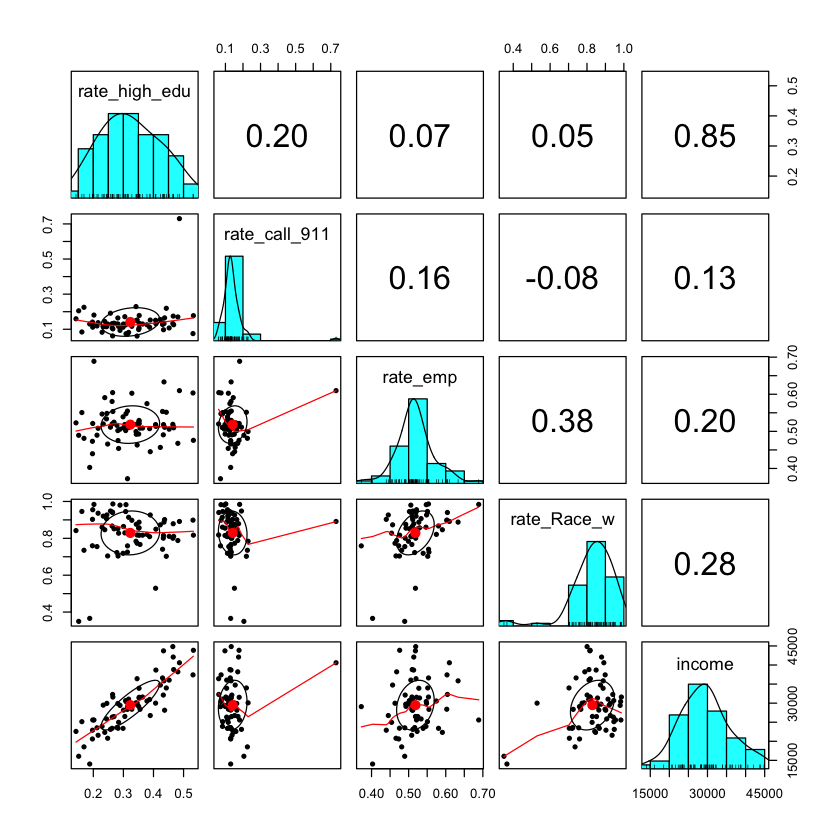

In [43]:
##These are two functions that give pair-wise correlation coefficients for every variable
round(cor(calls),4)
pairs.panels(calls)

## Note that rate_call_911 is not strongly associated to any variable.

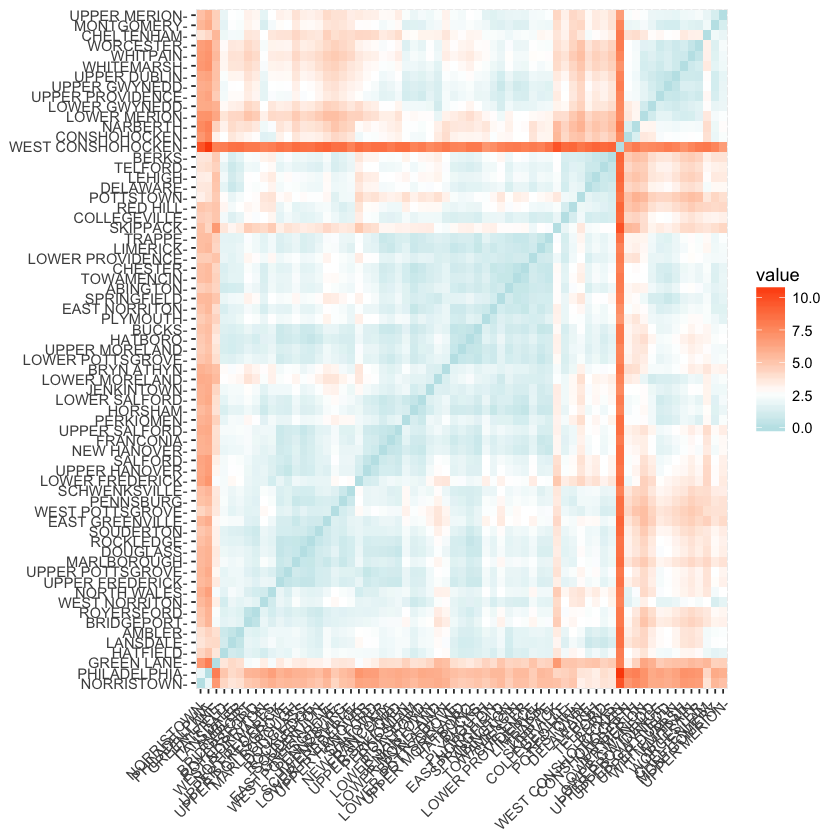

In [44]:
scaled_df = scale(calls)
distance_calls <- get_dist(scaled_df) #get_dist(): Computes a distance matrix between the rows of a data matrix.
fviz_dist(distance_calls, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))


## There seems to be strong clustering around some of the counties, maybe we shoud subset based on some parameter, lets do a PCA and see the distribution across the principal components.

Let's start by examining the data using a PCA to see if we can use PCs in order to minimize the number of dimensions.

In [45]:
####PCA###
apply(calls, 2, var)
scaled_df <- apply(calls, 2, scale)
head(scaled_df)
row.names(scaled_df) = row.names(calls)
glimpse(scaled_df)

rate_high_edu rate_call_911      rate_emp   rate_Race_w        income 
 9.470309e-03  6.663719e-03  2.567472e-03  1.418990e-02  4.247189e+07

rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
-0.05844929,-0.72842699,-0.1572533,0.7121584,0.24136723
-0.10013248,-0.09906703,0.7205339,-0.8725965,-0.17038548
-1.76405593,0.77980193,-0.5691729,-4.0273488,-2.05759062
-0.42710461,0.27960913,-0.3185273,0.1913426,0.06500468
-0.46016178,-0.14210299,-0.0377538,-0.8934559,-0.90209187
0.29816378,-0.10226007,0.2217301,0.2327085,0.28711708


 num [1:67, 1:5] -0.0584 -0.1001 -1.7641 -0.4271 -0.4602 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:67] "NEW HANOVER" "HATFIELD" "NORRISTOWN" "LOWER POTTSGROVE" ...
  ..$ : chr [1:5] "rate_high_edu" "rate_call_911" "rate_emp" "rate_Race_w" ...


,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
rate_high_edu,1.0000,0.1989,0.0718,0.0473,0.8532
rate_call_911,0.1989,1.0000,0.1557,-0.0788,0.1315
rate_emp,0.0718,0.1557,1.0000,0.3820,0.2000
rate_Race_w,0.0473,-0.0788,0.3820,1.0000,0.2832
income,0.8532,0.1315,0.2000,0.2832,1.0000


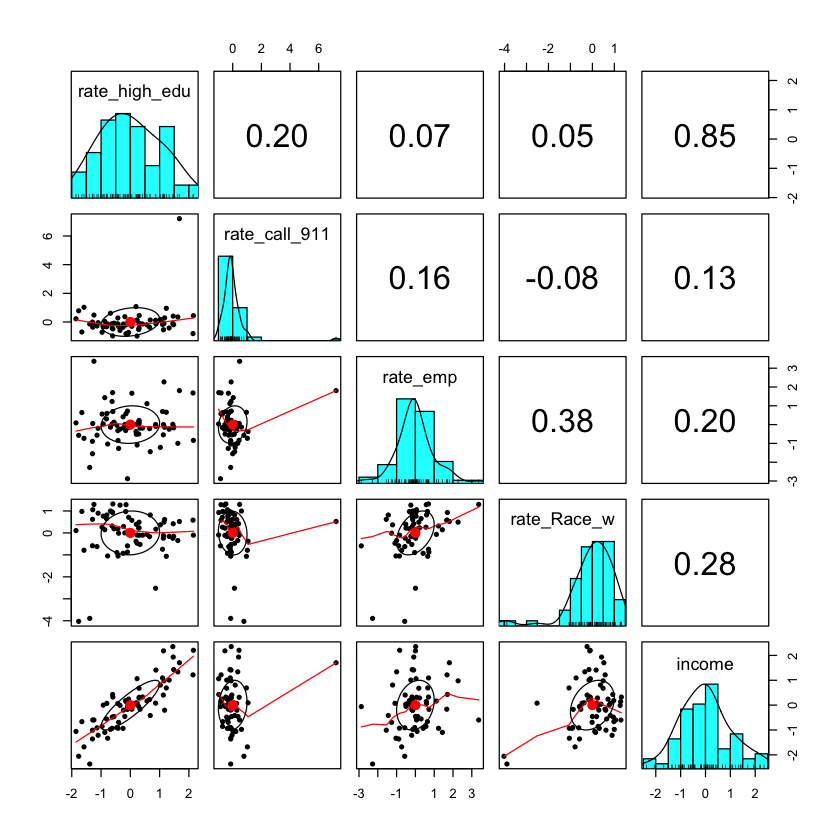

In [46]:
round(cor(scaled_df),4)
pairs.panels(scaled_df)

In [47]:
##There is a clear outlier that is driving the distribution in the rate of employment variable
##Should we eliminate this outlier??


List of 2
 $ values : num [1:5] 2.054 1.272 1.012 0.549 0.112
 $ vectors: num [1:5, 1:5] 0.598 0.216 0.302 0.294 0.647 ...
 - attr(*, "class")= chr "eigen"


0.5979166,0.3779687,0.1563978,0.11332053
0.2160886,0.2048090,-0.8704925,-0.39001090
0.3017340,-0.5938614,-0.3589452,0.65265270
0.2937344,-0.6611376,0.1963077,-0.63950157
0.6468989,0.1594320,0.2245085,0.01149606


,PC1,PC2,PC3,PC4
rate_high_edu,-0.5979166,-0.3779687,-0.1563978,-0.11332053
rate_call_911,-0.2160886,-0.2048090,0.8704925,0.39001090
rate_emp,-0.3017340,0.5938614,0.3589452,-0.65265270
rate_Race_w,-0.2937344,0.6611376,-0.1963077,0.63950157
income,-0.6468989,-0.1594320,-0.2245085,-0.01149606


,State,PC1,PC2,PC3,PC4
NEW HANOVER,NEW HANOVER,-0.1255244,0.51024677,-0.8753854,0.27781250
HATFIELD,HATFIELD,0.2304024,-0.06370746,0.3976060,-1.05361662
NORRISTOWN,NORRISTOWN,3.5720147,-2.16554845,2.0029504,-1.67633443
LOWER POTTSGROVE,LOWER POTTSGROVE,0.1928077,0.03114460,0.1437059,0.48695469
LANSDALE,LANSDALE,1.1632378,-0.26626484,0.3126367,-0.53963178
HORSHAM,HORSHAM,-0.4771735,0.14800083,-0.1662025,-0.07286664


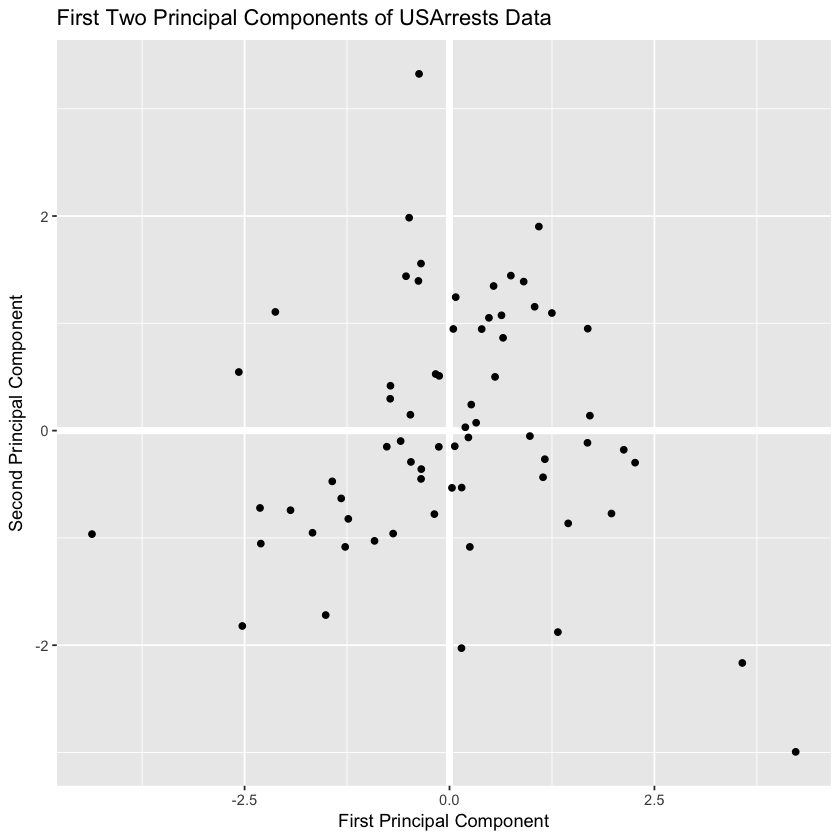

In [48]:
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
str(arrests.eigen)

(phi <- arrests.eigen$vectors[,1:4])

phi <- -phi
row.names(phi) <- c("rate_high_edu", "rate_call_911", "rate_emp", "rate_Race_w", "income")
colnames(phi) <- c("PC1", "PC2","PC3","PC4")
phi

PC1 <- as.matrix(scaled_df) %*% phi[,1]
PC2 <- as.matrix(scaled_df) %*% phi[,2]
PC3 <- as.matrix(scaled_df) %*% phi[,3]
PC4 <- as.matrix(scaled_df) %*% phi[,4]

# Create data frame with Principal Components scores
PC <- data.frame(State = row.names(scaled_df), PC1, PC2, PC3, PC4)
head(PC)

ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_point() +
  #geom_text(aes(label = State), size = 3) +
  xlab("First Principal Component") + 
  ylab("Second Principal Component") + 
  ggtitle("First Two Principal Components of USArrests Data")


## If you look at the loadings, we see that PC1 is dominated by rate_high_edu and income

In [49]:
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.41 0.25 0.20 0.11 0.02

## PC1 explains 41% of the variation and PC2 25% we only need these two

In [50]:
pca_result <- prcomp(scaled_df, scale = TRUE)
names(pca_result)

[1] "sdev"     "rotation" "center"   "scale"    "x"

,PC1,PC2,PC3,PC4,PC5
NEW HANOVER,-0.1255244,-0.51024677,-0.8753854,-0.27781250,0.06775725
HATFIELD,0.2304024,0.06370746,0.3976060,1.05361662,0.06421372
NORRISTOWN,3.5720147,2.16554845,2.0029504,1.67633443,0.47577630
LOWER POTTSGROVE,0.1928077,-0.03114460,0.1437059,-0.48695469,0.32707163
LANSDALE,1.1632378,0.26626484,0.3126367,0.53963178,-0.18010399
HORSHAM,-0.4771735,-0.14800083,-0.1662025,0.07286664,-0.05080144


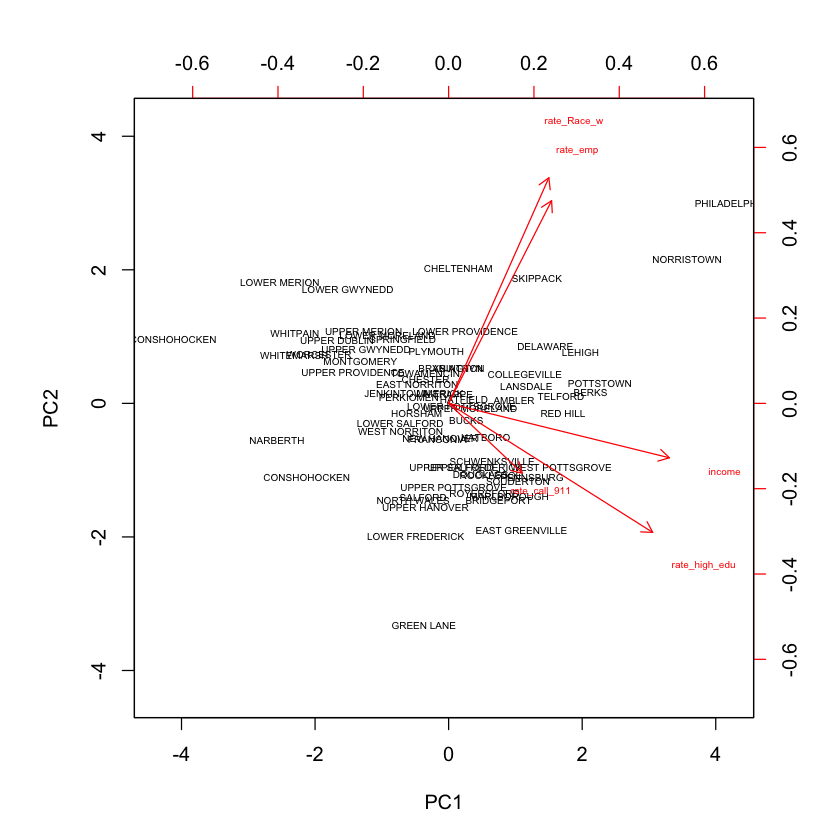

In [51]:
pca_result$x <- - pca_result$x
head(pca_result$x)

biplot(pca_result, scale = 0, cex = 0.5)

## Let's use the k-means technique to split the counties based on similarities across variables

In [54]:
###K-Means###

k3 <- kmeans(scaled_df, centers = 4, nstart = 25)
head(k3$cluster)
PC$Kmeans = k3$cluster
PC$Kmeans = as.factor(PC$Kmeans)
clusters_one = PC[PC$Kmeans == 1,] 
clusters_two = PC[PC$Kmeans == 2,] 
clusters_three = PC[PC$Kmeans == 3,] 
clusters_four = PC[PC$Kmeans == 4,] 




NEW HANOVER         HATFIELD       NORRISTOWN LOWER POTTSGROVE 
               1                1                4                1 
        LANSDALE          HORSHAM 
               4                2

## I split the data in 4 groups based on the overall variance of the dataset. The plot below is how the counties separate. Remember that PCA1 is highly driven by income and rate_high_education PC2 Is dominated by race and employment, so group 1 counties have lower income and more race diversity and group 4 have higher income and medium diversity, group 2 is the less diverse of medium income to low.

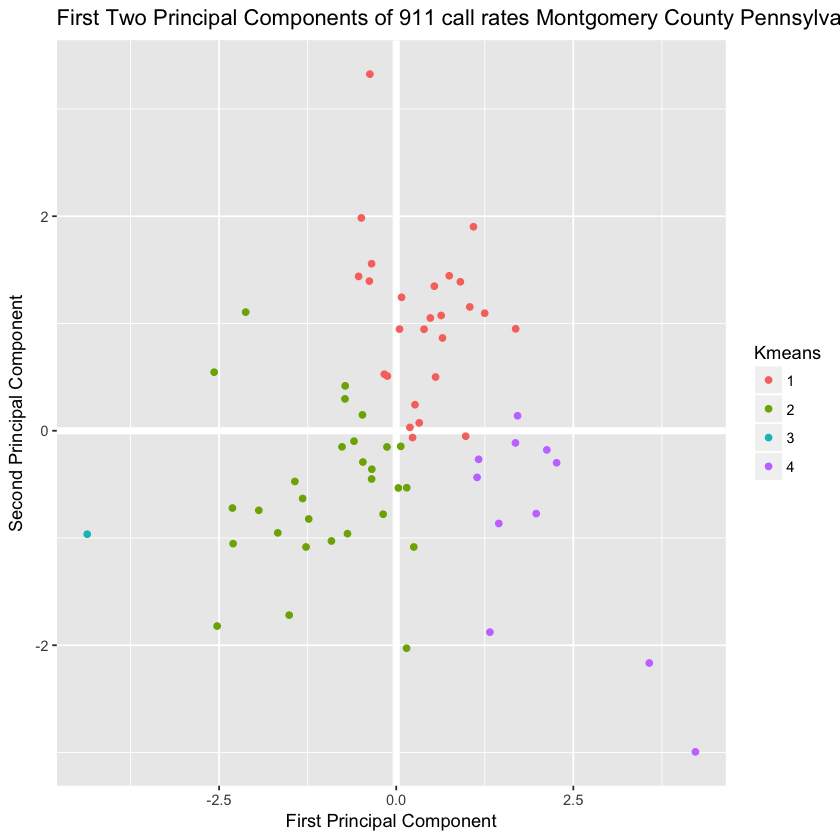

In [55]:
ggplot(PC, aes(PC1, PC2,color = Kmeans)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_point() +
  #geom_text(aes(label = State), size = 3) +
  xlab("First Principal Component") + 
  ylab("Second Principal Component") + 
  ggtitle("First Two Principal Components of 911 call rates Montgomery County Pennsylvania")

## Because income is the highest loading in PCA with -0.6468989, let's split the data with this variable in three groups and see if our correlations improve

,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
rate_high_edu,1.0000,-0.1406,-0.1504,-0.2239,0.5267
rate_call_911,-0.1406,1.0000,0.0422,-0.2349,-0.4522
rate_emp,-0.1504,0.0422,1.0000,0.0957,-0.0540
rate_Race_w,-0.2239,-0.2349,0.0957,1.0000,0.3117
income,0.5267,-0.4522,-0.0540,0.3117,1.0000


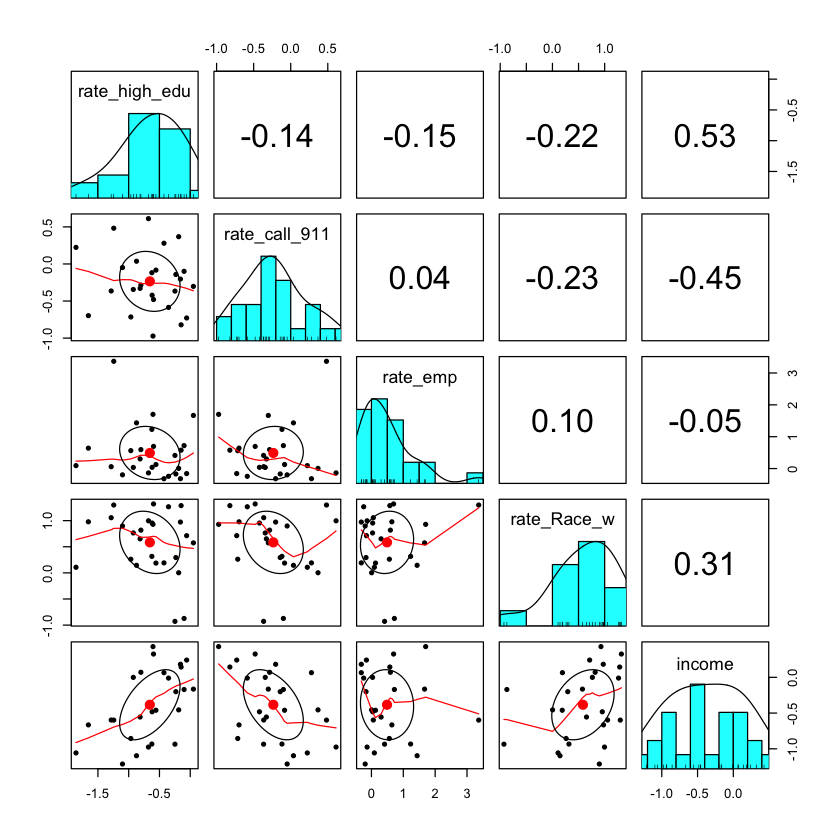

In [56]:
scaled_df_K = cbind(scaled_df,PC$Kmeans)
scaled_df_K = as.data.frame(scaled_df_K)


low = scaled_df_K[scaled_df_K$V6==1,]
low = low[,1:5]
round(cor(low),4)
pairs.panels(low)


# wow look at those correlations, there is a lot more power in this subset as income and rate_high_edu are highly correlated to rate_911_calls. Another important piece of information is the sign of the correlation. Income is negatively correlated which means that the higher the income the less number of 911 calls, similar to rate_high_edu.

,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
rate_high_edu,NA,NA,NA,NA,NA
rate_call_911,NA,NA,NA,NA,NA
rate_emp,NA,NA,NA,NA,NA
rate_Race_w,NA,NA,NA,NA,NA
income,NA,NA,NA,NA,NA


Warning message in qt(1 - alpha/2, n.obs - 2):
“NaNs produced”Warning message in min(diff(breaks)):
“no non-missing arguments to min; returning Inf”Warning message in min(diff(breaks)):
“no non-missing arguments to min; returning Inf”Warning message in min(diff(breaks)):
“no non-missing arguments to min; returning Inf”Warning message in min(diff(breaks)):
“no non-missing arguments to min; returning Inf”Warning message in min(diff(breaks)):
“no non-missing arguments to min; returning Inf”

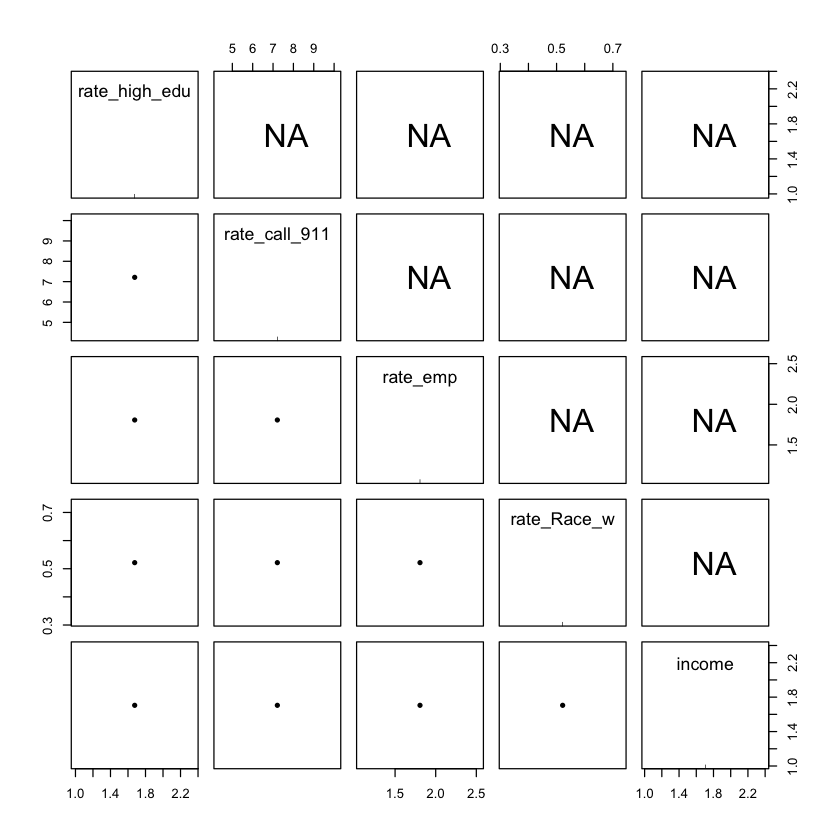

In [57]:
high = scaled_df_K[scaled_df_K$V6==3,]
high = high[,1:5]
round(cor(high),4)
pairs.panels(high)

# things look very different to our higher income counties, there is no really correlations across variables and the rates of 9_11 calls as expected as there is not a strong separationg of race and income in this group.

,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
rate_high_edu,1.0000,-0.7646,-0.2463,0.4553,0.8196
rate_call_911,-0.7646,1.0000,0.5079,-0.3498,-0.6729
rate_emp,-0.2463,0.5079,1.0000,0.0458,-0.1811
rate_Race_w,0.4553,-0.3498,0.0458,1.0000,0.7595
income,0.8196,-0.6729,-0.1811,0.7595,1.0000


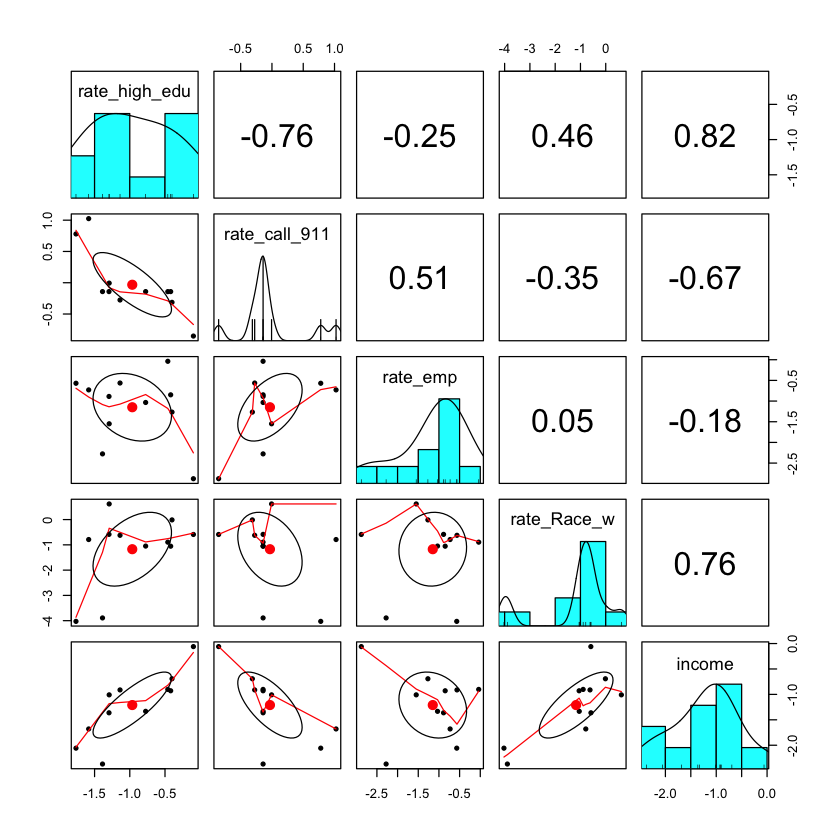

In [58]:
mid = scaled_df_K[scaled_df_K$V6==4,]
mid = mid[,1:5]
round(cor(mid),4)
pairs.panels(mid)

# There even less correlations here, there might be some other components that could be driving this group that we havent been able to detect.

## Finally, let's compare the k-means approach to the hierarchichal clustering approach

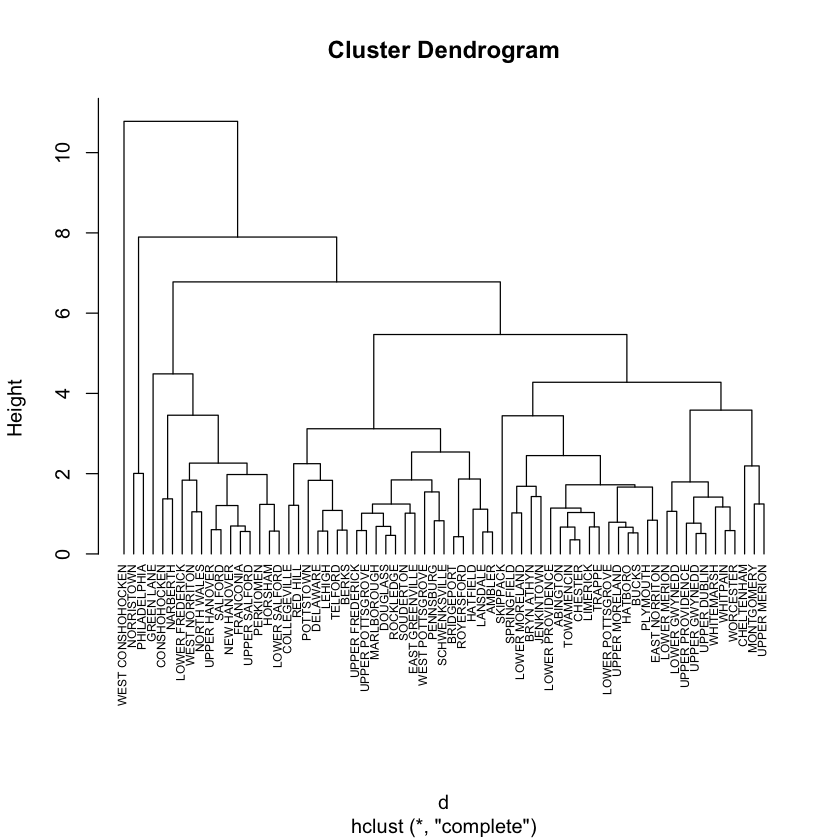

In [59]:
##Hierarchical Clustering

# Dissimilarity matrix
d <- dist(scaled_df, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

# We are using an euclidean distance and a complete linkage clustering algorith, we can see 3 or 4 clear clusters with some strong outliers.

In [60]:
# methods to assess which is the best clustering method for this dataset
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(scaled_df, method = x)$ac
}

map_dbl(m, ac)

average    single  complete      ward 
0.8643360 0.8578116 0.8943225 0.9094814

## The coefficients are very similar but it seems that the ward method might be better for this data. let's look

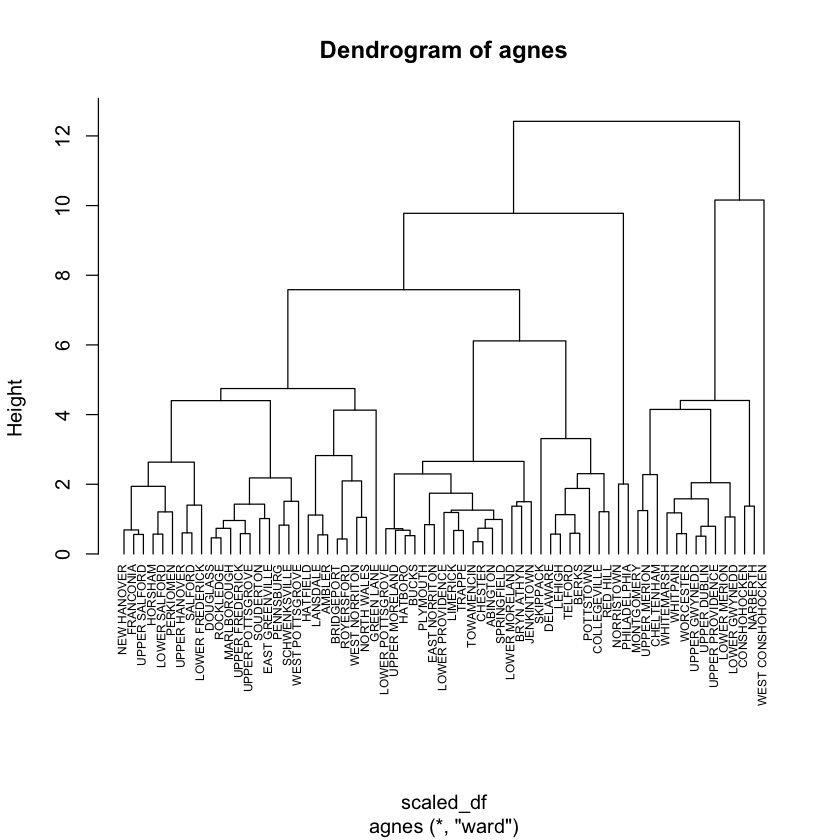

In [61]:
hc3 <- agnes(scaled_df, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes") 

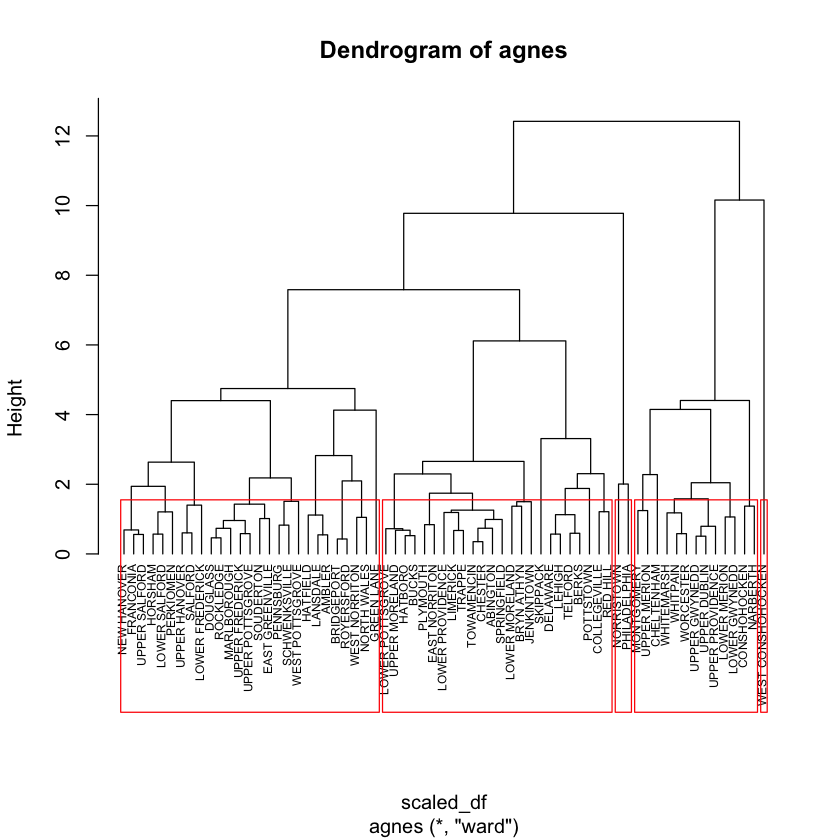

In [62]:
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes")
rect.hclust(hc3, k = 5)

# Three clear large clusters and two outliers that might be introducing noise to the data. You can cut the data with these groups and get the correlations plots and see if the signal improves.

### The plot below is a different representation of the clusters from k-means. 

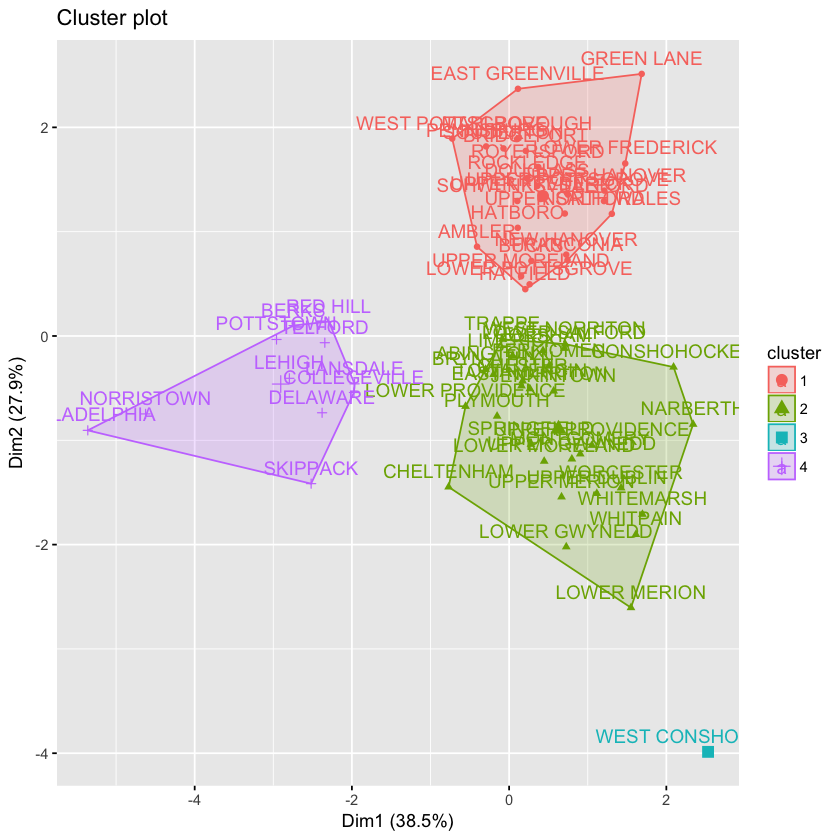

In [63]:
fviz_cluster(list(data = scaled_df_K, cluster = scaled_df_K$V6))

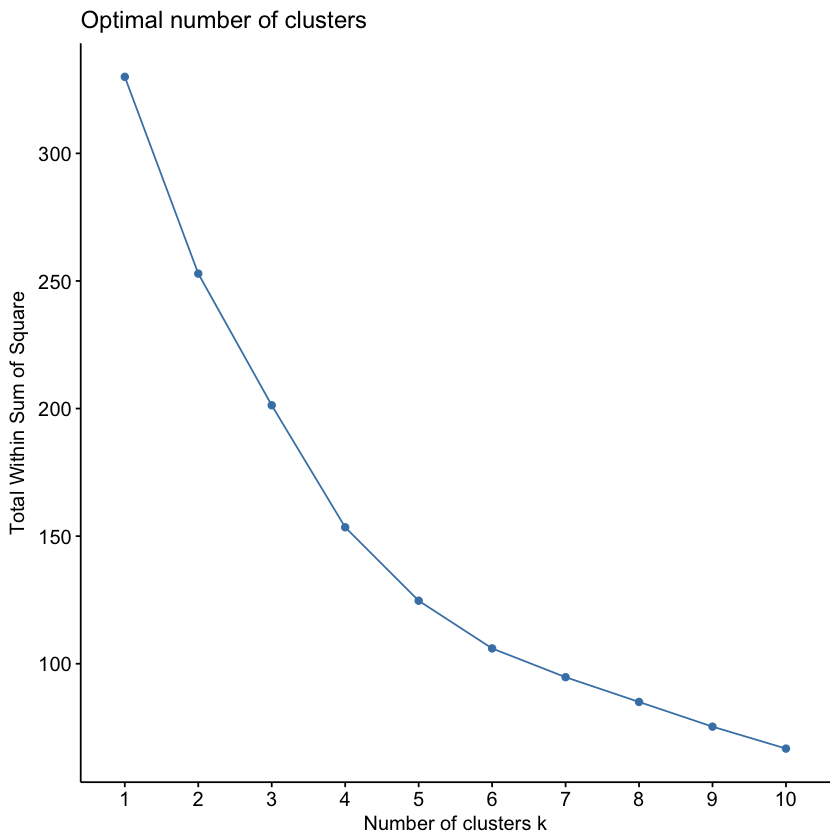

In [64]:
fviz_nbclust(scaled_df, FUN = hcut, method = "wss")